<a href="https://colab.research.google.com/github/NikitaMarnykh/karnegie_mellon_university_machine_analysis/blob/main/%D0%9C%D0%B0%D1%80%D0%BD%D1%8B%D1%85_%D0%9D_%D0%92_%D1%83%D0%BD%D0%B8%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%82%D0%B5%D1%82_%D0%9A%D0%B0%D1%80%D0%BD%D0%B5%D0%B3%D0%B8_%D0%9C%D0%B5%D0%BB%D0%BE%D0%BD_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%BF%D1%80%D0%B8%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Признаки, которые будут использованы для дальнейшего анализа:

  * Количественные признаки:
  
    - mpg

    - cylinders

    - displacement

    - horsepower

    - weight

    - acceleration

    - model year

  * Категориальные признаки:

    - origin

## 6. Установка и подключение зависимостей

Устанавливаем все необходимые зависимости

In [186]:
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install scipy
!pip install seaborn

Подключаем все необходимые зависимости

In [187]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import scipy.stats as stats

import seaborn as sns

Подгружаем репозиторий для работы с ним

In [188]:
!git clone https://github.com/NikitaMarnykh/karnegie_mellon_university_machine_analysis

Cloning into 'karnegie_mellon_university_machine_analysis'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 36 (delta 23), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (36/36), 296.26 KiB | 3.41 MiB/s, done.
Resolving deltas: 100% (23/23), done.


Перейдём в установленный репозиторий

In [189]:
%cd karnegie_mellon_university_machine_analysis/

/content/karnegie_mellon_university_machine_analysis


Сохраним датасет в переменную

In [190]:
dtypes = {
    'origin': 'category'
}

dataset = pd.read_csv('auto-mpg-cleaned.csv',
                      na_values=['NA', 'N/A', 'null', 'missing', '-', '?', '...'],
                      keep_default_na=True,
                      na_filter=True,
                      dtype=dtypes)

Посмотрим информацию о датасете

In [191]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   mpg            398 non-null    float64 
 1   cylinders      398 non-null    int64   
 2   displacement   398 non-null    float64 
 3   horsepower     398 non-null    float64 
 4   weight         398 non-null    int64   
 5   acceleration   398 non-null    float64 
 6   model year     398 non-null    int64   
 7   origin         398 non-null    category
 8   origin_Europe  398 non-null    bool    
 9   origin_Asia    398 non-null    bool    
dtypes: bool(2), category(1), float64(4), int64(3)
memory usage: 23.2 KB


## 7. Неграфический и графический анализ количественных признаков

### 7.1 Признак mpg

Сохраним признак в переменную sign

In [192]:
sign = 'mpg'

Рассчитаем минимальное и максимальное значение признака

In [193]:
min_value = dataset[sign].min()
max_value =  dataset[sign].max()
print(f'Минимум {sign}: {min_value}')
print(f'Максимум {sign}: {max_value}')

Минимум mpg: 9.0
Максимум mpg: 46.6


Рассчитаем среднее значение признака

In [194]:
mean_value = dataset[sign].mean()
print(f'Среднее {sign}: {mean_value}')

Среднее mpg: 23.514572864321607


Рассчитаем медианный пробег на галлон топлива

In [195]:
median_value = dataset[sign].median()
print(f'Медианное {sign}: {median_value}')

Медианное mpg: 23.0


Рассчитаем процентили 10, 25, 50, 75, 90

In [196]:
percentile_10_value = dataset[sign].quantile(0.10)
percentile_25_value = dataset[sign].quantile(0.25)
percentile_50_value = dataset[sign].quantile(0.50)
percentile_75_value = dataset[sign].quantile(0.75)
percentile_90_value = dataset[sign].quantile(0.90)
print(f'10-й процентиль {sign}: {percentile_10_value}')
print(f'25-й процентиль {sign}: {percentile_25_value}')
print(f'50-й процентиль {sign}: {percentile_50_value}')
print(f'75-й процентиль {sign}: {percentile_75_value}')
print(f'90-й процентиль {sign}: {percentile_90_value}')

10-й процентиль mpg: 14.0
25-й процентиль mpg: 17.5
50-й процентиль mpg: 23.0
75-й процентиль mpg: 29.0
90-й процентиль mpg: 34.33


Посмотрим значение описательной статистики

In [197]:
dataset[sign].describe()

,mpg
count,398.000000
mean,23.514573
std,7.815984
min,9.000000
25%,17.500000
50%,23.000000
75%,29.000000
max,46.600000


Построим диаграмму "ящик с усами" для признака

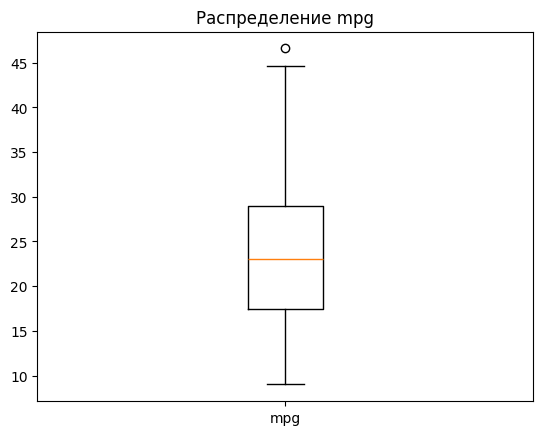

In [198]:
plt.boxplot(dataset[sign], tick_labels=[sign])
plt.title(f'Распределение {sign}')
plt.show()

Построим гисторграмму для признака по формуле Стёрджеса

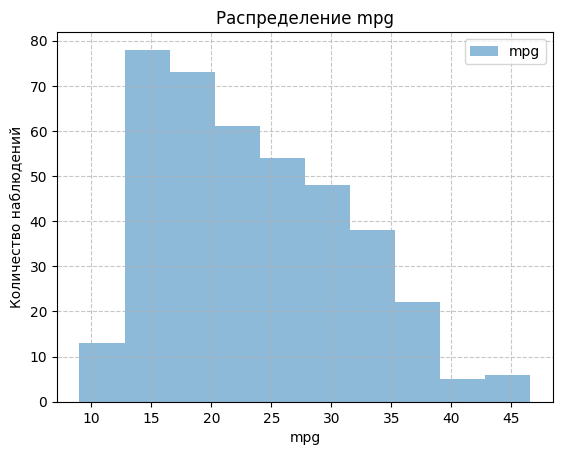

In [199]:
plt.hist(dataset[sign], bins='sturges', alpha=0.5, label=f'{sign}')
plt.title(f'Распределение {sign}')
plt.xlabel(f'{sign}')
plt.ylabel('Количество наблюдений')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Посмотрим на коэффициент асимметрии

In [200]:
print(f"Коэффициент асимметрии {sign}: {stats.skew(dataset[sign])}")

Коэффициент асимметрии mpg: 0.45534192556309266


Посмотрим на коэффициент эксцесса

In [201]:
print(f"Коэффициент эксцесса {sign}: {stats.kurtosis(dataset[sign])}")

Коэффициент эксцесса mpg: -0.5194245405990441


Выводы по анализу признака:
  * **О размахе значений**:

    * Минимальное значение признака составляет **9.0**.

    * Максимальное значение признака составляет **46.6**.

    * Таким образом, размах значений признака довольно велик, что указывает на значительную вариативность данных.

  * **О нулевых и пропущенных значениях**:

    * Нулевые и пропущенные значения отсутствуют. Специальная предобработка в данном аспекте не требуется.

  * **О средних величинах и распределении**:

    * Среднее значение признака составляет **23.51**.

    * Медианное значение признака составляет **23.0**.

    * Среднее и медиана находятся близко друг к другу, что может свидетельствовать об относительно симметричном распределении. Однако положительный коэффициент асимметрии (**0.46**) указывает на наличие **правосторонней асимметрии**. Это означает, что хвост распределения вытянут вправо, в сторону бóльших значений.

  * **О процентилях**:

    * **10%** наблюдений имеют значение признака не более **14.0**.

    * **25%** наблюдений имеют значение признака не более **17.5** (нижний квантиль).

    * **50%** наблюдений имеют значение признака не более **23.0** (медиана).

    * **75%** наблюдений имеют значение признака не более **29.0** (верхний квантиль).

    * **90%** наблюдений имеют значение признака не более **34.33**.

  * **О результатах графического и статистического анализа**:

    * **Гистограмма и "Ящик с усами"**: Распределение признака является **унимодальным**. На ящике с усами видно, что межквартильный размах (IQR) расположен симметрично относительно медианы, однако наличие выбросов в правой части графика (соответствующих аномально высоким значениям) подтверждает вывод о правосторонней асимметрии.

    * **Выбросы**: Присутствует незначительное количество выбросов, расположенных выше верхней усы графика. Решение об их исключении должно приниматься на основе предметной области, так как они могут быть как ошибками измерения, так и реальными редкими случаями.

    * **Эксцесс**: Отрицательное значение коэффициента эксцесса (**-0.52**) указывает на то, что распределение является более пологим (платикуртическим) по сравнению с нормальным распределением, и имеет более легкие хвосты.



### 7.2 Признак cylinders

Сохраним признак в переменную sign

In [202]:
sign = 'cylinders'

Рассчитаем минимальное и максимальное значение признака

In [203]:
min_value = dataset[sign].min()
max_value =  dataset[sign].max()
print(f'Минимум {sign}: {min_value}')
print(f'Максимум {sign}: {max_value}')

Минимум cylinders: 3
Максимум cylinders: 8


Рассчитаем среднее значение признака

In [204]:
mean_value = dataset[sign].mean()
print(f'Среднее {sign}: {mean_value}')

Среднее cylinders: 5.454773869346734


Рассчитаем медианный пробег на галлон топлива

In [205]:
median_value = dataset[sign].median()
print(f'Медианное {sign}: {median_value}')

Медианное cylinders: 4.0


Рассчитаем процентили 10, 25, 50, 75, 90

In [206]:
percentile_10_value = dataset[sign].quantile(0.10)
percentile_25_value = dataset[sign].quantile(0.25)
percentile_50_value = dataset[sign].quantile(0.50)
percentile_75_value = dataset[sign].quantile(0.75)
percentile_90_value = dataset[sign].quantile(0.90)
print(f'10-й процентиль {sign}: {percentile_10_value}')
print(f'25-й процентиль {sign}: {percentile_25_value}')
print(f'50-й процентиль {sign}: {percentile_50_value}')
print(f'75-й процентиль {sign}: {percentile_75_value}')
print(f'90-й процентиль {sign}: {percentile_90_value}')

10-й процентиль cylinders: 4.0
25-й процентиль cylinders: 4.0
50-й процентиль cylinders: 4.0
75-й процентиль cylinders: 8.0
90-й процентиль cylinders: 8.0


Посмотрим значение описательной статистики

In [207]:
dataset[sign].describe()

,cylinders
count,398.000000
mean,5.454774
std,1.701004
min,3.000000
25%,4.000000
50%,4.000000
75%,8.000000
max,8.000000


Построим диаграмму "ящик с усами" для признака

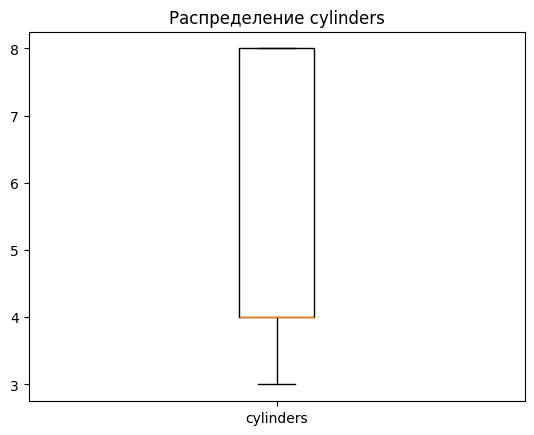

In [208]:
plt.boxplot(dataset[sign], tick_labels=[sign])
plt.title(f'Распределение {sign}')
plt.show()

Построим гисторграмму для признака по формуле Стёрджеса

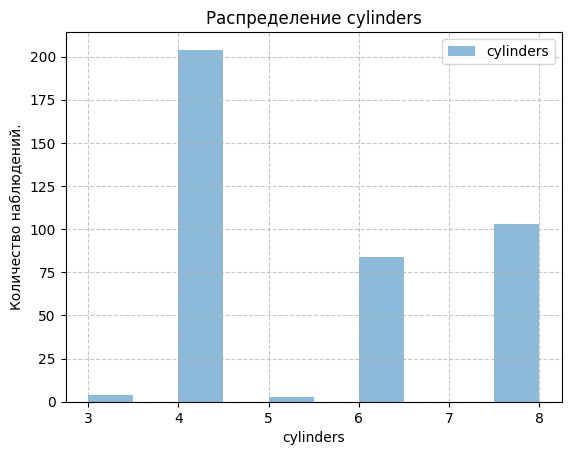

In [209]:
plt.hist(dataset[sign], bins='sturges', alpha=0.5, label=f'{sign}')
plt.title(f'Распределение {sign}')
plt.xlabel(f'{sign}')
plt.ylabel('Количество наблюдений.')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Посмотрим на коэффициент асимметрии

In [210]:
print(f"Коэффициент асимметрии {sign}: {stats.skew(dataset[sign])}")

Коэффициент асимметрии cylinders: 0.5249335774421718


Посмотрим на коэффициент эксцесса

In [211]:
print(f"Коэффициент эксцесса {sign}: {stats.kurtosis(dataset[sign])}")

Коэффициент эксцесса cylinders: -1.3744657460935465


Выводы по анализу признака:
  * **О размахе значений**:

    * Минимальное значение признака составляет **3**.

    * Максимальное значение признака составляет **8**.

    * Таким образом, признак является дискретным и принимает ограниченный набор целочисленных значений.


  * **О нулевых и пропущенных значениях**:

    * Нулевые и пропущенные значения отсутствуют. Специальная предобработка в данном аспекте не требуется.

  * **О средних величинах и распределении**:

    * Среднее значение признака составляет **5.45**.

    * Медианное значение признака составляет **4.0**.

    * Среднее значение существенно превышает медиану, что является явным индикатором сильной правосторонней асимметрии. Это подтверждается положительным коэффициентом асимметрии (**0.52**). Распределение сконцентрировано на меньших значениях, с редкими, но высокими значениями, которые "тянут" среднее вверх.

  * **О процентилях**:

    * **10%** наблюдений имеют значение признака не более **4.0**.

    * **25%** наблюдений имеют значение признака не более **4.0** (нижний квантиль).

    * **50%** наблюдений имеют значение признака не более **4.0** (медиана).

    * **75%** наблюдений имеют значение признака не более **8.0** (верхний квантиль).

    * **90%** наблюдений имеют значение признака не более **8.0**.

    * Анализ процентилей ярко демонстрирует **бимодальность** распределения: большинство наблюдений (около **50%**) сосредоточены вокруг значения 4, а следующая крупная группа — вокруг значения 8.

  * **О результатах графического и статистического анализа**:

    * **Гистограмма и "Ящик с усами"**: Распределение признака является **бимодальным**, с явными пиками на значениях 4 и 8. На ящике с усами видно, что медиана находится на нижней границе ящика, а сам ящик очень короткий, что указывает на высокую концентрацию данных в точке 4. Значение 8 формирует вторую плотную группу.

    * **Выбросы**: Значения 3, 5 могут рассматриваться как выбросы на фоне доминирующих групп с 4, 6 и 8. Однако, учитывая природу признака (дискретный), их исключение нецелесообразно (возможно более практично объеденить их в одну группу);

    * **Эксцесс**: Сильно отрицательное значение коэффициента эксцесса (**-1.37**) указывает на то, что распределение является значительно более пологим (платикуртическим) по сравнению с нормальным распределением. Это логично для бимодального распределения, где данные сконцентрированы в двух отдельных кластерах, а не вокруг одного центра.



### 7.3 Признак displacement

Сохраним признак в переменную sign

In [212]:
sign = 'displacement'

Рассчитаем минимальное и максимальное значение признака

In [213]:
min_value = dataset[sign].min()
max_value =  dataset[sign].max()
print(f'Минимум {sign}: {min_value}')
print(f'Максимум {sign}: {max_value}')

Минимум displacement: 68.0
Максимум displacement: 455.0


Рассчитаем среднее значение признака

In [214]:
mean_value = dataset[sign].mean()
print(f'Среднее {sign}: {mean_value}')

Среднее displacement: 193.42587939698493


Рассчитаем медианный пробег на галлон топлива

In [215]:
median_value = dataset[sign].median()
print(f'Медианное {sign}: {median_value}')

Медианное displacement: 148.5


Рассчитаем процентили 10, 25, 50, 75, 90

In [216]:
percentile_10_value = dataset[sign].quantile(0.10)
percentile_25_value = dataset[sign].quantile(0.25)
percentile_50_value = dataset[sign].quantile(0.50)
percentile_75_value = dataset[sign].quantile(0.75)
percentile_90_value = dataset[sign].quantile(0.90)
print(f'10-й процентиль {sign}: {percentile_10_value}')
print(f'25-й процентиль {sign}: {percentile_25_value}')
print(f'50-й процентиль {sign}: {percentile_50_value}')
print(f'75-й процентиль {sign}: {percentile_75_value}')
print(f'90-й процентиль {sign}: {percentile_90_value}')

10-й процентиль displacement: 90.0
25-й процентиль displacement: 104.25
50-й процентиль displacement: 148.5
75-й процентиль displacement: 262.0
90-й процентиль displacement: 350.0


Посмотрим значение описательной статистики

In [217]:
dataset[sign].describe()

,displacement
count,398.000000
mean,193.425879
std,104.269838
min,68.000000
25%,104.250000
50%,148.500000
75%,262.000000
max,455.000000


Построим диаграмму "ящик с усами" для признака

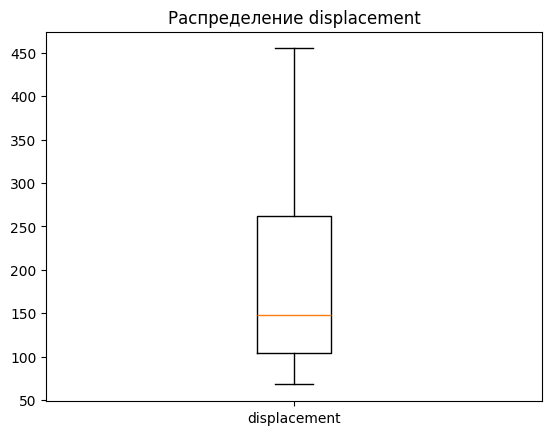

In [218]:
plt.boxplot(dataset[sign], tick_labels=[sign])
plt.title(f'Распределение {sign}')
plt.show()

Построим гисторграмму для признака по формуле Стёрджеса

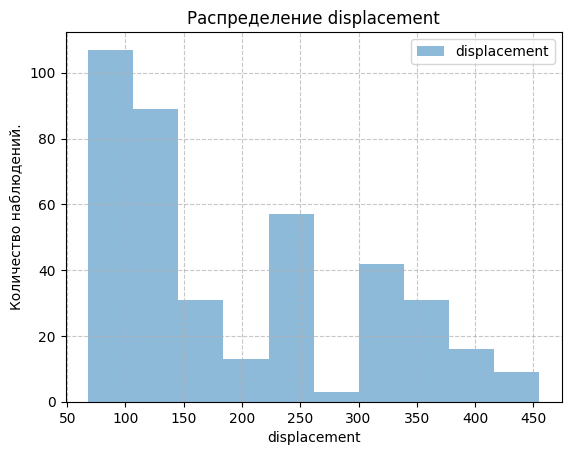

In [219]:
plt.hist(dataset[sign], bins='sturges', alpha=0.5, label=f'{sign}')
plt.title(f'Распределение {sign}')
plt.xlabel(f'{sign}')
plt.ylabel('Количество наблюдений.')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Посмотрим на коэффициент асимметрии

In [220]:
print(f"Коэффициент асимметрии {sign}: {stats.skew(dataset[sign])}")

Коэффициент асимметрии displacement: 0.716930089340474


Посмотрим на коэффициент эксцесса

In [221]:
print(f"Коэффициент эксцесса {sign}: {stats.kurtosis(dataset[sign])}")

Коэффициент эксцесса displacement: -0.7522878026396289


Выводы по анализу признака:

*   **О размахе значений:**

    *   Минимальное значение признака составляет **68.0**.

    *   Максимальное значение признака составляет **455.0**.

    *   Таким образом, размах значений признака очень велик, что указывает на значительную вариативность данных в выборке.

*   **О нулевых и пропущенных значениях:**

    *   Нулевые и пропущенные значения отсутствуют. Специальная предобработка в данном аспекте не требуется.

*   **О средних величинах и распределении:**

    *   Среднее значение признака составляет **193.43**.

    *   Медианное значение признака составляет **148.5**.

    *   Среднее значение существенно превышает медиану, что является явным индикатором сильной **правосторонней асимметрии**. Это подтверждается положительным коэффициентом асимметрии (**0.72**). Распределение смещено влево, с длинным хвостом в сторону бóльших значений, которые "тянут" среднее арифметическое вправо.

*   **О процентилях:**

    *   **10%** наблюдений имеют значение признака не более **90.0**.

    *   **25%** наблюдений имеют значение признака не более **104.25** (нижний квантиль).

    *   **50%** наблюдений имеют значение признака не более **148.5** (медиана).

    *   **75%** наблюдений имеют значение признака не более **262.0** (верхний квантиль).

    *   **90%** наблюдений имеют значение признака не более **350.0**.

*   **О результатах графического и статистического анализа:**

    *   **Гистограмма и "Ящик с усами":** Распределение признака является унимодальным**. На ящике с усами видно, что медиана смещена к нижней границе ящика, а сам ящик вытянут вверх, что визуально подтверждает правостороннюю асимметрию и наличие значений, значительно превышающих верхний квантиль.

    *   **Выбросы:** Присутствует значительное количество выбросов, расположенных выше верхней усы графика. Эти выбросы соответствуют автомобилям с очень большим объемом двигателя. Решение об их исключении должно приниматься на основе предметной области, так как они являются реальными, хотя и редкими, случаями.

    *   **Эксцесс:** Отрицательное значение коэффициента эксцесса (**-0.75**) указывает на то, что распределение является более пологим (платикуртическим) по сравнению с нормальным распределением, что характерно для распределений с тяжелым хвостом и широким пиком.

### 7.4 Признак horsepower

Сохраним признак в переменную sign

In [222]:
sign = 'horsepower'

Рассчитаем минимальное и максимальное значение признака

In [223]:
min_value = dataset[sign].min()
max_value =  dataset[sign].max()
print(f'Минимум {sign}: {min_value}')
print(f'Максимум {sign}: {max_value}')

Минимум horsepower: 46.0
Максимум horsepower: 230.0


Рассчитаем среднее значение признака

In [224]:
mean_value = dataset[sign].mean()
print(f'Среднее {sign}: {mean_value}')

Среднее horsepower: 104.33417085427136


Рассчитаем медианный пробег на галлон топлива

In [225]:
median_value = dataset[sign].median()
print(f'Медианное {sign}: {median_value}')

Медианное horsepower: 93.5


Рассчитаем процентили 10, 25, 50, 75, 90

In [226]:
percentile_10_value = dataset[sign].quantile(0.10)
percentile_25_value = dataset[sign].quantile(0.25)
percentile_50_value = dataset[sign].quantile(0.50)
percentile_75_value = dataset[sign].quantile(0.75)
percentile_90_value = dataset[sign].quantile(0.90)
print(f'10-й процентиль {sign}: {percentile_10_value}')
print(f'25-й процентиль {sign}: {percentile_25_value}')
print(f'50-й процентиль {sign}: {percentile_50_value}')
print(f'75-й процентиль {sign}: {percentile_75_value}')
print(f'90-й процентиль {sign}: {percentile_90_value}')

10-й процентиль horsepower: 67.0
25-й процентиль horsepower: 75.0
50-й процентиль horsepower: 93.5
75-й процентиль horsepower: 125.0
90-й процентиль horsepower: 155.90000000000003


Посмотрим значение описательной статистики

In [227]:
dataset[sign].describe()

,horsepower
count,398.000000
mean,104.334171
std,38.377764
min,46.000000
25%,75.000000
50%,93.500000
75%,125.000000
max,230.000000


Построим диаграмму "ящик с усами" для признака

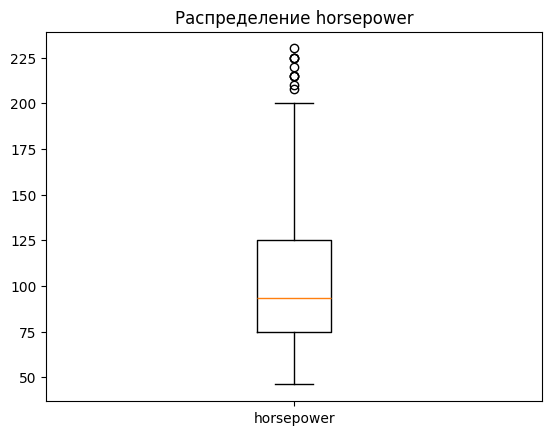

In [228]:
plt.boxplot(dataset[sign], tick_labels=[sign])
plt.title(f'Распределение {sign}')
plt.show()

Построим гисторграмму для признака по формуле Стёрджеса

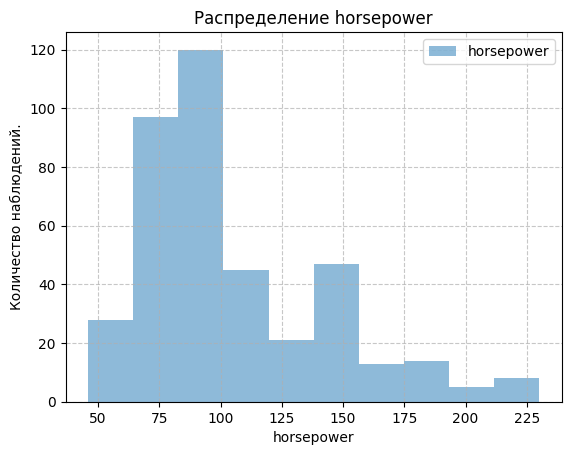

In [229]:
plt.hist(dataset[sign], bins='sturges', alpha=0.5, label=f'{sign}')
plt.title(f'Распределение {sign}')
plt.xlabel(f'{sign}')
plt.ylabel('Количество наблюдений.')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Посмотрим на коэффициент асимметрии

In [230]:
print(f"Коэффициент асимметрии {sign}: {stats.skew(dataset[sign])}")

Коэффициент асимметрии horsepower: 1.0798133332033086


Посмотрим на коэффициент эксцесса

In [231]:
print(f"Коэффициент эксцесса {sign}: {stats.kurtosis(dataset[sign])}")

Коэффициент эксцесса horsepower: 0.6870469989400299


Выводы по анализу признака:

*   **О размахе значений:**

    *   Минимальное значение признака составляет **46.0**.

    *   Максимальное значение признака составляет **230.0**.

    *   Таким образом, размах значений признака очень велик, что указывает на значительную вариативность данных в выборке.

*   **О нулевых и пропущенных значениях:**

    *   Нулевые и пропущенные значения отсутствуют. Специальная предобработка в данном аспекте не требуется.

*   **О средних величинах и распределении:**

    *   Среднее значение признака составляет **104.33**.

    *   Медианное значение признака составляет **93.5**.

    *   Среднее значение существенно превышает медиану, что является явным индикатором сильной **правосторонней асимметрии**. Это подтверждается высоким положительным коэффициентом асимметрии (**1.08**). Распределение сильно смещено влево, с длинным хвостом в сторону бóльших значений, которые "тянут" среднее арифметическое вправо.

*   **О процентилях:**

    *   **10%** наблюдений имеют значение признака не более **67.0**.

    *   **25%** наблюдений имеют значение признака не более **75.0** (нижний квантиль).

    *   **50%** наблюдений имеют значение признака не более **93.5** (медиана).

    *   **75%** наблюдений имеют значение признака не более **125.0** (верхний квантиль).

    *   **90%** наблюдений имеют значение признака не более **155.9**.

*   **О результатах графического и статистического анализа:**

    *   **Гистограмма и "Ящик с усами":** Распределение признака является **унимодальным**. На ящике с усами видно, что медиана расположена близко к нижней границе ящика, а сам ящик значительно вытянут вверх, что визуально подтверждает сильную правостороннюю асимметрию и наличие многочисленных значений, значительно превышающих верхний квантиль.

    *   **Выбросы:** Присутствует значительное количество выбросов, расположенных выше верхней усы графика. Эти выбросы соответствуют автомобилям с очень высокой мощностью двигателя. Решение об их исключении должно приниматься на основе предметной области, так как они являются реальными, хотя и редкими, случаями.

    *   **Эксцесс:** Положительное значение коэффициента эксцесса (**0.69**) указывает на то, что распределение является более островершинным (лептокуртическим) по сравнению с нормальным распределением и имеет более тяжелые хвосты, что согласуется с наличием выраженной асимметрии и выбросов.

### 7.5 Признак weight

Сохраним признак в переменную sign

In [232]:
sign = 'weight'

Рассчитаем минимальное и максимальное значение признака

In [233]:
min_value = dataset[sign].min()
max_value =  dataset[sign].max()
print(f'Минимум {sign}: {min_value}')
print(f'Максимум {sign}: {max_value}')

Минимум weight: 1613
Максимум weight: 5140


Рассчитаем среднее значение признака

In [234]:
mean_value = dataset[sign].mean()
print(f'Среднее {sign}: {mean_value}')

Среднее weight: 2970.424623115578


Рассчитаем медианный пробег на галлон топлива

In [235]:
median_value = dataset[sign].median()
print(f'Медианное {sign}: {median_value}')

Медианное weight: 2803.5


Рассчитаем процентили 10, 25, 50, 75, 90

In [236]:
percentile_10_value = dataset[sign].quantile(0.10)
percentile_25_value = dataset[sign].quantile(0.25)
percentile_50_value = dataset[sign].quantile(0.50)
percentile_75_value = dataset[sign].quantile(0.75)
percentile_90_value = dataset[sign].quantile(0.90)
print(f'10-й процентиль {sign}: {percentile_10_value}')
print(f'25-й процентиль {sign}: {percentile_25_value}')
print(f'50-й процентиль {sign}: {percentile_50_value}')
print(f'75-й процентиль {sign}: {percentile_75_value}')
print(f'90-й процентиль {sign}: {percentile_90_value}')

10-й процентиль weight: 1988.5
25-й процентиль weight: 2223.75
50-й процентиль weight: 2803.5
75-й процентиль weight: 3608.0
90-й процентиль weight: 4275.2


Посмотрим значение описательной статистики

In [237]:
dataset[sign].describe()

,weight
count,398.000000
mean,2970.424623
std,846.841774
min,1613.000000
25%,2223.750000
50%,2803.500000
75%,3608.000000
max,5140.000000


Построим диаграмму "ящик с усами" для признака

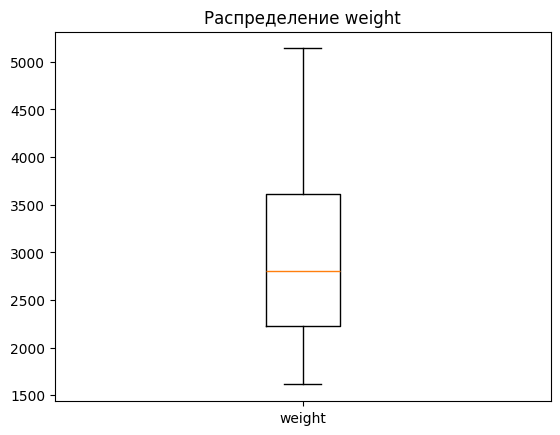

In [238]:
plt.boxplot(dataset[sign], tick_labels=[sign])
plt.title(f'Распределение {sign}')
plt.show()

Построим гисторграмму для признака по формуле Стёрджеса

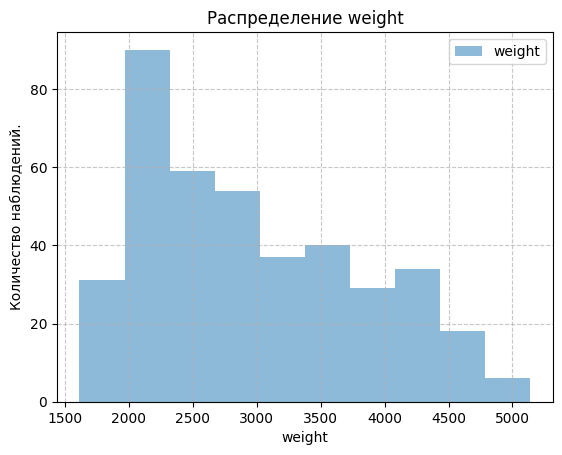

In [239]:
plt.hist(dataset[sign], bins='sturges', alpha=0.5, label=f'{sign}')
plt.title(f'Распределение {sign}')
plt.xlabel(f'{sign}')
plt.ylabel('Количество наблюдений.')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Посмотрим на коэффициент асимметрии

In [240]:
print(f"Коэффициент асимметрии {sign}: {stats.skew(dataset[sign])}")

Коэффициент асимметрии weight: 0.5290589216608383


Посмотрим на коэффициент эксцесса

In [241]:
print(f"Коэффициент эксцесса {sign}: {stats.kurtosis(dataset[sign])}")

Коэффициент эксцесса weight: -0.7907326965772179


Выводы по анализу признака:

*   **О размахе значений:**

    *   Минимальное значение признака составляет **1613**.

    *   Максимальное значение признака составляет **5140**.

    *   Таким образом, размах значений признака очень велик, что указывает на значительную вариативность данных в выборке.

*   **О нулевых и пропущенных значениях:**

    *   Нулевые и пропущенные значения отсутствуют. Специальная предобработка в данном аспекте не требуется.

*   **О средних величинах и распределении:**

    *   Среднее значение признака составляет **2970.42**.

    *   Медианное значение признака составляет **2803.5**.

    *   Среднее значение превышает медиану, что является индикатором **правосторонней асимметрии**. Это подтверждается положительным коэффициентом асимметрии (**0.53**). Распределение смещено влево, с хвостом в сторону бóльших значений, которые "тянут" среднее арифметическое вправо.

*   **О процентилях:**
    *   **10%** наблюдений имеют значение признака не более **1988.5**.
    
    *   **25%** наблюдений имеют значение признака не более **2223.75** (нижний квантиль).

    *   **50%** наблюдений имеют значение признака не более **2803.5** (медиана).

    *   **75%** наблюдений имеют значение признака не более **3608.0** (верхний квантиль).

    *   **90%** наблюдений имеют значение признака не более **4275.2**.

*   **О результатах графического и статистического анализа:**

    *   **Гистограмма и "Ящик с усами":** Распределение признака является **унимодальным**. На ящике с усами видно, что медиана смещена к нижней границе ящика, а сам ящик вытянут вверх, что визуально подтверждает правостороннюю асимметрию и наличие значений, значительно превышающих верхний квантиль.

    *   **Выбросы:** Присутствует некоторое количество выбросов, расположенных выше верхней усы графика. Эти выбросы соответствуют автомобилям с очень большим весом. Решение об их исключении должно приниматься на основе предметной области, так как они являются реальными, хотя и редкими, случаями.

    *   **Эксцесс:** Отрицательное значение коэффициента эксцесса (**-0.79**) указывает на то, что распределение является более пологим (платикуртическим) по сравнению с нормальным распределением, что характерно для распределений с широким пиком и умеренно тяжелыми хвостами.

### 7.6 Признак acceleration

Сохраним признак в переменную sign

In [242]:
sign = 'acceleration'

Рассчитаем минимальное и максимальное значение признака

In [243]:
min_value = dataset[sign].min()
max_value =  dataset[sign].max()
print(f'Минимум {sign}: {min_value}')
print(f'Максимум {sign}: {max_value}')

Минимум acceleration: 8.0
Максимум acceleration: 24.8


Рассчитаем среднее значение признака

In [244]:
mean_value = dataset[sign].mean()
print(f'Среднее {sign}: {mean_value}')

Среднее acceleration: 15.568090452261307


Рассчитаем медианный пробег на галлон топлива

In [245]:
median_value = dataset[sign].median()
print(f'Медианное {sign}: {median_value}')

Медианное acceleration: 15.5


Рассчитаем процентили 10, 25, 50, 75, 90

In [246]:
percentile_10_value = dataset[sign].quantile(0.10)
percentile_25_value = dataset[sign].quantile(0.25)
percentile_50_value = dataset[sign].quantile(0.50)
percentile_75_value = dataset[sign].quantile(0.75)
percentile_90_value = dataset[sign].quantile(0.90)
print(f'10-й процентиль {sign}: {percentile_10_value}')
print(f'25-й процентиль {sign}: {percentile_25_value}')
print(f'50-й процентиль {sign}: {percentile_50_value}')
print(f'75-й процентиль {sign}: {percentile_75_value}')
print(f'90-й процентиль {sign}: {percentile_90_value}')

10-й процентиль acceleration: 12.0
25-й процентиль acceleration: 13.825000000000001
50-й процентиль acceleration: 15.5
75-й процентиль acceleration: 17.175
90-й процентиль acceleration: 19.0


Посмотрим значение описательной статистики

In [247]:
dataset[sign].describe()

,acceleration
count,398.000000
mean,15.568090
std,2.757689
min,8.000000
25%,13.825000
50%,15.500000
75%,17.175000
max,24.800000


Построим диаграмму "ящик с усами" для признака

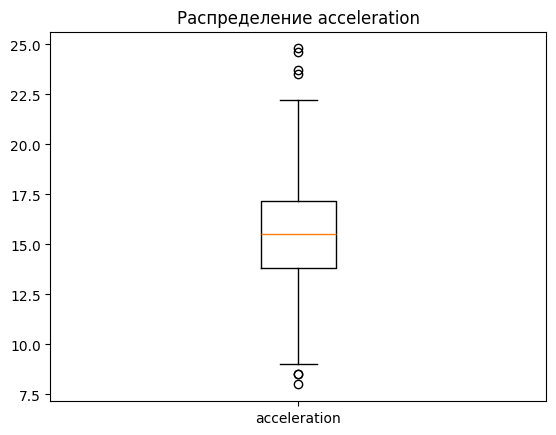

In [248]:
plt.boxplot(dataset[sign], tick_labels=[sign])
plt.title(f'Распределение {sign}')
plt.show()

Построим гисторграмму для признака по формуле Стёрджеса

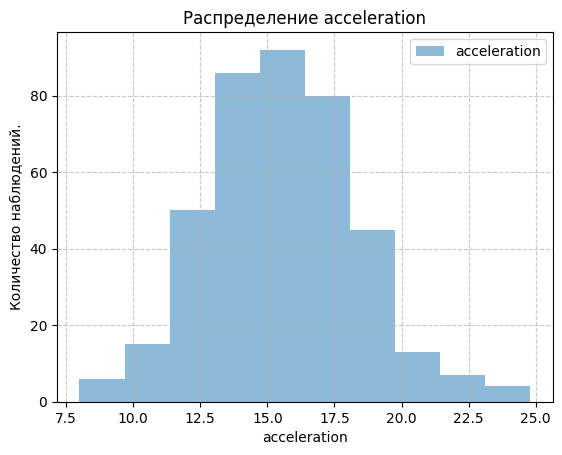

In [249]:
plt.hist(dataset[sign], bins='sturges', alpha=0.5, label=f'{sign}')
plt.title(f'Распределение {sign}')
plt.xlabel(f'{sign}')
plt.ylabel('Количество наблюдений.')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Посмотрим на коэффициент асимметрии

In [250]:
print(f"Коэффициент асимметрии {sign}: {stats.skew(dataset[sign])}")

Коэффициент асимметрии acceleration: 0.27772507624356363


Посмотрим на коэффициент эксцесса

In [251]:
print(f"Коэффициент эксцесса {sign}: {stats.kurtosis(dataset[sign])}")

Коэффициент эксцесса acceleration: 0.3992077323931644


Выводы по анализу признака:

*   **О размахе значений:**

    *   Минимальное значение признака составляет **8.0**.

    *   Максимальное значение признака составляет **24.8**.

    *   Таким образом, размах значений признака является умеренным по сравнению с другими признаками в выборке.

*   **О нулевых и пропущенных значениях:**

    *   Нулевые и пропущенные значения отсутствуют. Специальная предобработка в данном аспекте не требуется.

*   **О средних величинах и распределении:**

    *   Среднее значение признака составляет **15.57**.
    
    *   Медианное значение признака составляет **15.5**.
    
    *   Среднее и медиана находятся очень близко друг к другу, что указывает на симметричное распределение. Незначительный положительный коэффициент асимметрии (**0.28**) подтверждает наличие слабой **правосторонней асимметрии**.

*   **О процентилях:**

    *   **10%** наблюдений имеют значение признака не более **12.0**.

    *   **25%** наблюдений имеют значение признака не более **13.83** (нижний квантиль).

    *   **50%** наблюдений имеют значение признака не более **15.5** (медиана).

    *   **75%** наблюдений имеют значение признака не более **17.18** (верхний квантиль).

    *   **90%** наблюдений имеют значение признака не более **19.0**.

*   **О результатах графического и статистического анализа:**

    *   **Гистограмма и "Ящик с усами":** Распределение признака является **унимодальным** и близким к симметричному. На ящике с усами видно, что медиана расположена примерно по центру ящика, а длины усов в обе стороны сопоставимы, что свидетельствует о сбалансированности распределения.

    *   **Выбросы:** Присутствует незначительное количество выбросов с обеих сторон распределения (как в области минимальных, так и в области максимальных значений). Эти выбросы соответствуют автомобилям с аномально низким или высоким ускорением. Решение об их исключении должно приниматься на основе предметной области.

    *   **Эксцесс:** Положительное значение коэффициента эксцесса (**0.40**) указывает на то, что распределение является более островершинным (лептокуртическим) по сравнению с нормальным распределением и имеет более тяжелые хвосты, что согласуется с наличием выбросов.

### 7.7 Признак model year

Сохраним признак в переменную sign

In [252]:
sign = 'model year'

Рассчитаем минимальное и максимальное значение признака

In [253]:
min_value = dataset[sign].min()
max_value =  dataset[sign].max()
print(f'Минимум {sign}: {min_value}')
print(f'Максимум {sign}: {max_value}')

Минимум model year: 70
Максимум model year: 82


Рассчитаем среднее значение признака

In [254]:
mean_value = dataset[sign].mean()
print(f'Среднее {sign}: {mean_value}')

Среднее model year: 76.01005025125629


Рассчитаем медианный пробег на галлон топлива

In [255]:
median_value = dataset[sign].median()
print(f'Медианное {sign}: {median_value}')

Медианное model year: 76.0


Рассчитаем процентили 10, 25, 50, 75, 90

In [256]:
percentile_10_value = dataset[sign].quantile(0.10)
percentile_25_value = dataset[sign].quantile(0.25)
percentile_50_value = dataset[sign].quantile(0.50)
percentile_75_value = dataset[sign].quantile(0.75)
percentile_90_value = dataset[sign].quantile(0.90)
print(f'10-й процентиль {sign}: {percentile_10_value}')
print(f'25-й процентиль {sign}: {percentile_25_value}')
print(f'50-й процентиль {sign}: {percentile_50_value}')
print(f'75-й процентиль {sign}: {percentile_75_value}')
print(f'90-й процентиль {sign}: {percentile_90_value}')

10-й процентиль model year: 71.0
25-й процентиль model year: 73.0
50-й процентиль model year: 76.0
75-й процентиль model year: 79.0
90-й процентиль model year: 81.0


Посмотрим значение описательной статистики

In [257]:
dataset[sign].describe()

,model year
count,398.000000
mean,76.010050
std,3.697627
min,70.000000
25%,73.000000
50%,76.000000
75%,79.000000
max,82.000000


Построим диаграмму "ящик с усами" для признака

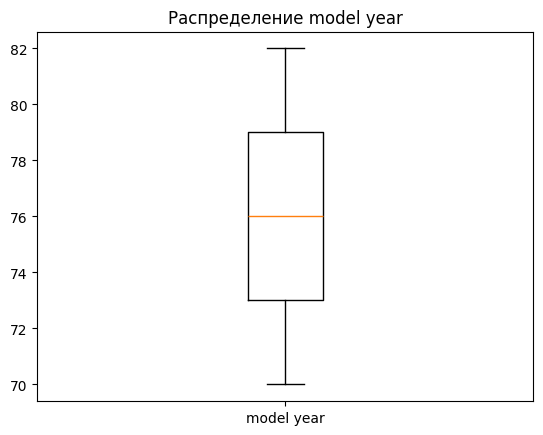

In [258]:
plt.boxplot(dataset[sign], tick_labels=[sign])
plt.title(f'Распределение {sign}')
plt.show()

Построим гисторграмму для признака по формуле Стёрджеса

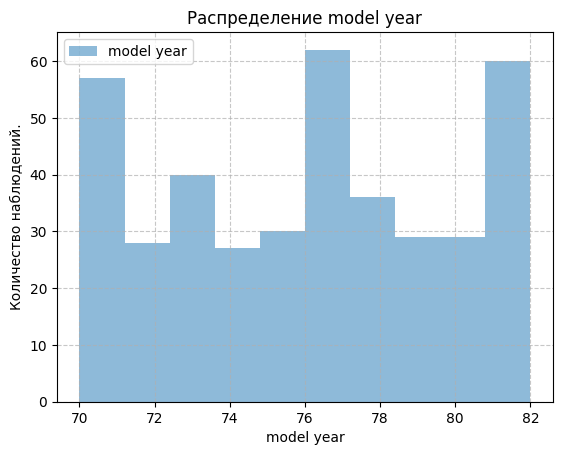

In [259]:
plt.hist(dataset[sign], bins='sturges', alpha=0.5, label=f'{sign}')
plt.title(f'Распределение {sign}')
plt.xlabel(f'{sign}')
plt.ylabel('Количество наблюдений.')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Посмотрим на коэффициент асимметрии

In [260]:
print(f"Коэффициент асимметрии {sign}: {stats.skew(dataset[sign])}")

Коэффициент асимметрии model year: 0.011491076335909905


Посмотрим на коэффициент эксцесса

In [261]:
print(f"Коэффициент эксцесса {sign}: {stats.kurtosis(dataset[sign])}")

Коэффициент эксцесса model year: -1.1814818486666614


Выводы по анализу признака:

*   **О размахе значений:**

    *   Минимальное значение признака составляет **70**.

    *   Максимум модели составляет **82**.

    *   Таким образом, данные охватывают 13-летний период, что представляет собой полную и непрерывную временную выборку.

*   **О нулевых и пропущенных значениях:**

    *   Нулевые и пропущенные значения отсутствуют. Специальная предобработка в данном аспекте не требуется.

*   **О средних величинах и распределении:**

    *   Среднее значение признака составляет **76.01**.

    *   Медианное значение признака составляет **76.0**.

    *   Среднее и медиана практически совпадают, что указывает на симметричное распределение. Коэффициент асимметрии близок к нулю (**0.01**), что подтверждает вывод о практически **идеальной симметрии** распределения.

*   **О процентилях:**

    *   **10%** наблюдений относятся к году не старше **71**.

    *   **25%** наблюдений относятся к году не старше **73** (нижний квантиль).

    *   **50%** наблюдений относятся к году не старше **76** (медиана).

    *   **75%** наблюдений относятся к году не старше **79** (верхний квантиль).

    *   **90%** наблюдений относятся к году не старше **81**.

*   **О результатах графического и статистического анализа:**

    *   **Гистограмма и "Ящик с усами":** Распределение признака является **полимодальным**, с несколькими пиками, что соответствует разным годам выпуска. На ящике с усами видно, что медиана расположена по центру ящика, а сам ящик симметричен, что визуально подтверждает сбалансированность распределения по годам.

    *   **Выбросы:** Выбросы в традиционном понимании отсутствуют, так как признак представляет собой дискретные временные отметки, и все значения являются валидными.

    *   **Эксцесс:** Сильно отрицательное значение коэффициента эксцесса (**-1.18**) указывает на то, что распределение является значительно более пологим (платикуртическим) по сравнению с нормальным распределением. Это логично для равномерного распределения данных по нескольким годам, когда данные не сконцентрированы вокруг одного центра, а распределены по нескольким модам.

## 8. Неграфический и графический анализ категориальных признаков

### 8.1 Признак origin

Сохраним признак в переменную sign

In [263]:
sign = 'origin'

Оценим описательные статистики признака

In [264]:
dataset[sign].describe()

,origin
count,398
unique,3
top,1
freq,249


Изучим уникальные значения признака

In [265]:
dataset[sign].unique()

['1', '3', '2']
Categories (3, object): ['1', '2', '3']

Выведем количество уникальных значений

In [266]:
print(f'Количество уникальных значений {sign}: {dataset[sign].unique().shape}')

Количество уникальных значений origin: (3,)


Проведём неграфический структурный анализ. Сохраним результаты работы метода отсортировав значения.

In [267]:
value_counts = dataset[sign].value_counts().sort_values(ascending=False)
value_counts

,count
origin,
1,249
3,79
2,70


Визуализируем распределение топ значений категориального признака в виде круговой диаграммы с вынесенными значениями в легенду.

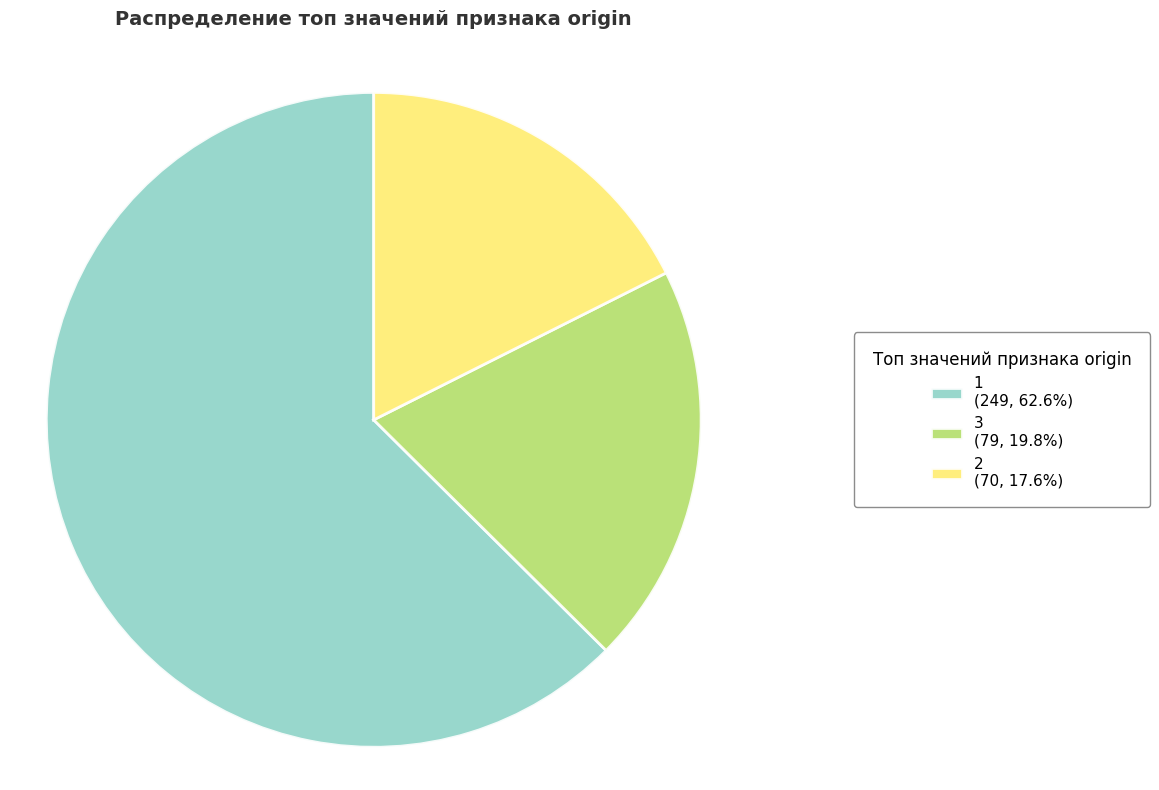

In [270]:
colors = plt.cm.Set3(np.linspace(0, 1, len(value_counts)))
wedgeprops = {
    'edgecolor': 'white',
    'linewidth': 2,
    'linestyle': '-',
    'alpha': 0.9
}
textprops = {
    'fontsize': 12,
    'color': 'black',
    'fontweight': 'normal'
}
# Создаем круговую диаграмму и получаем 3 набора объектов:
# patches - сектора диаграммы, texts - текстовые элементы (здесь пустые), autotexts - проценты (здесь пустые)

fig, ax = plt.subplots(figsize=(12, 8))

patches, texts, autotexts = plt.pie(
    value_counts,          # Данные для отображения (топ частых значений)
    labels=None,           # Не показываем стандартные подписи (будем использовать легенду)
    autopct='',            # Не показываем проценты внутри секторов (добавим в легенду)
    startangle=90,         # Начальный угол поворота (90° = начало сверху)
    colors=colors,         # Цвета для секторов
    wedgeprops=wedgeprops, # Свойства секторов (границы и т.д.)
    textprops=textprops,   # Свойства текста (размер шрифта)
)

# Рассчитываем общее количество (для вычисления процентов)
total = value_counts.sum()

# Создаем список процентных соотношений с форматированием (1 знак после запятой)
percentages = [f'{(count/total)*100:.1f}%' for count in value_counts.values]

# Формируем подписи для легенды в формате:
# Название категории
# (Абсолютное значение, Процентное соотношение)
legend_labels = [
    f'{label}\n({count}, {percent})'  # \n - перенос строки
    for label, count, percent in zip(
        value_counts.index,           # Названия категорий
        value_counts.values,          # Абсолютные значения
        percentages                   # Процентные соотношения
    )
]

# Создаем легенду с кастомными подписями
legend = plt.legend(patches,                                               # Сектора диаграммы (для отображения цветных маркеров)
                    legend_labels,                                         # Сформированные подписи
                    title=f"Топ значений признака {sign}",                 # Заголовок легенды
                    loc="center left",                                     # Позиционирование относительно диаграммы
                    bbox_to_anchor=(1.15, 0.5),                            # Смещение легенды (вправо на 15% от ширины)
                    fontsize=11,                                           # Размер шрифта подписей
                    title_fontsize=12,                                     # Размер шрифта заголовка
                    framealpha=0.9,                                        # Прозрачность фона легенды
                    edgecolor='gray',                                      # Цвет границы легенды
                    borderpad=1.2                                          # Отступ внутри легенды
)

# Добавляем заголовок диаграммы
plt.title(f'Распределение топ значений признака {sign}',   # Текст заголовка
          pad=25,                                            # Отступ от верха диаграммы
          fontsize=14,                                       # Размер шрифта
          fontweight='bold',                                 # Жирное начертание
          color='#333333'                                    # Цвет текста (темно-серый)
)

# Делаем диаграмму идеально круглой (без искажений)
plt.axis('equal')

# Автоматически регулируем отступы для предотвращения обрезания элементов
plt.tight_layout()

# Отображаем диаграмму
plt.show()

Выводы по анализу признака:

  * **О количестве уникальных значений признака:**
    * Признак содержит 3 уникальных значения

  * **О наиболее часто встречаемом значении признака:**
    
    * Наиболее частым значением является **"1"**, которое встречается **249** раз, что составляет **62.6%** от общего количества наблюдений

    * **О распределении значений признака:**
      * **Наиболее встречаемые значения:**

        * 1: **249** наблюдений (**62.6%**)

      * **Наименее встречаемые значения:**

        * 3: **79** наблюдений (**19.8%**)

        * 2: **70** наблюдений (**17.6%**)


  * **О результатах графического анализа:**

    * Круговая диаграмма наглядно демонстрирует доминирующее положение значения **"1"** в распределении, которое занимает более половины всех наблюдений (**62.6%**). Остальные два значения распределены относительно равномерно, с небольшим преобладанием значения **"3"** (**19.8%**) над значением **"2"**(**17.6%**).